### bert fine tuned link
https://colab.research.google.com/drive/1XTEc3NqVI_GzvgLvwLQRd4HB2VSzsZqo?usp=sharing

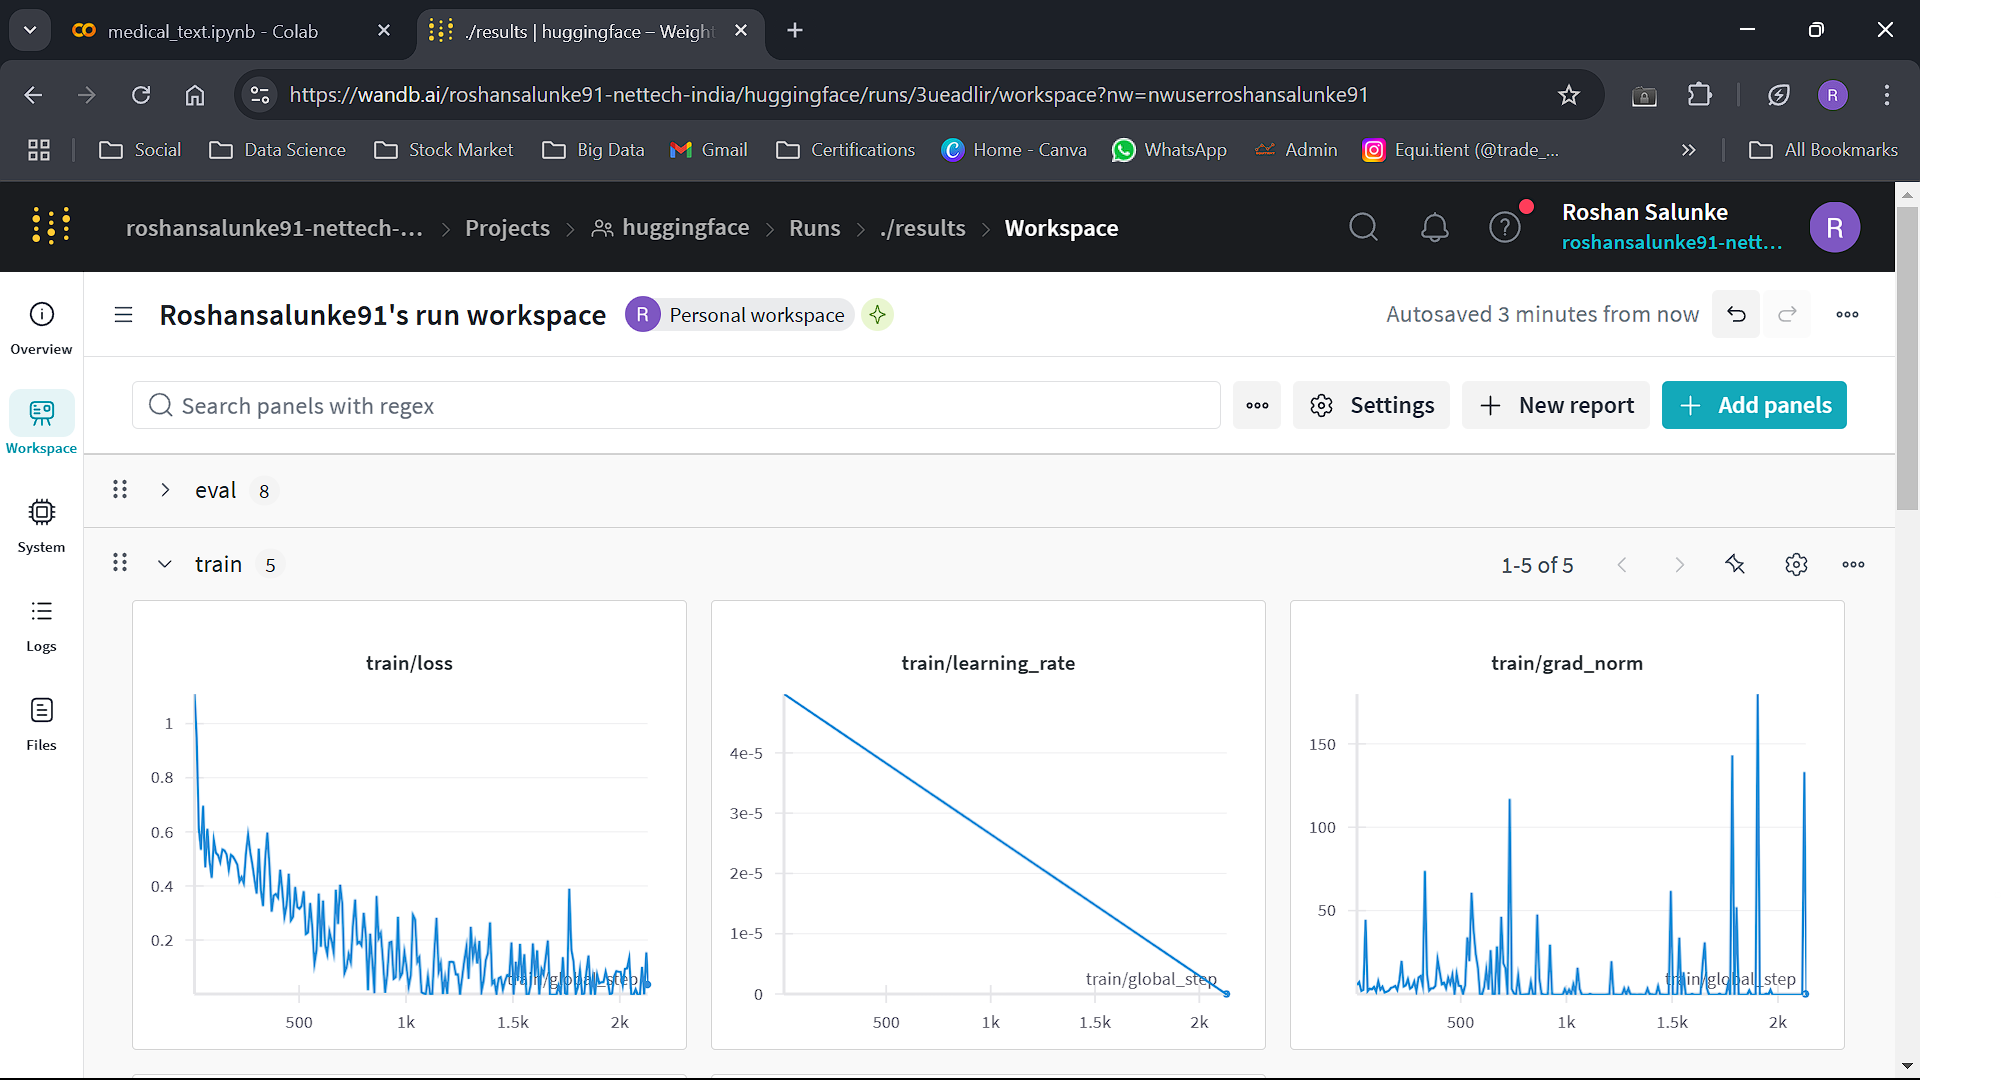

![image.png](attachment:image.png)

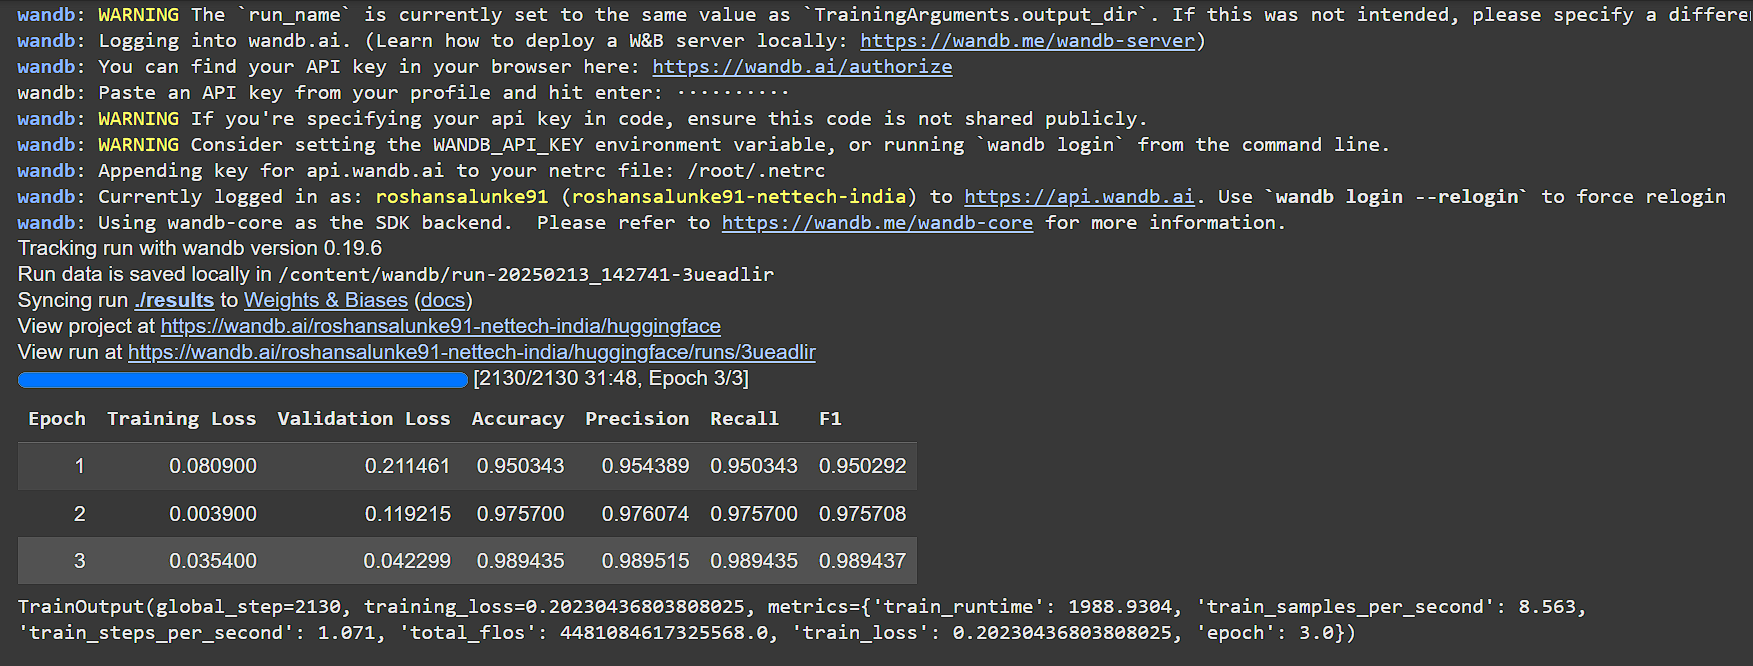

In [ ]:
!pip install kagglehub
!pip install pandas

     ---------------------------------------- 54.5/54.5 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 63.8/63.8 kB 1.1 MB/s eta 0:00:00
  Using cached packaging-24.2-py3-none-any.whl (65 kB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
     ---------------------------------------- 3.2/3.2 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 99.2/99.2 kB 2.8 MB/s eta 0:00:00
  Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Using cached charset_normalizer-3.4.1-cp311-cp311-win_amd64.whl (102 kB)
  Using cached idna-3.10-py3-none-any.whl (70 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl (128 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl (166 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Using cached cffi-1.17.1-cp311-cp311-win_amd64.whl (181 kB)
  Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl (434 kB)
  Using cached pyasn1-0.6.1-p

In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("falgunipatel19/biomedical-text-publication-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Roshan Salunke\.cache\kagglehub\datasets\falgunipatel19\biomedical-text-publication-classification\versions\1


In [2]:
import os

dataset_path = r"C:\Users\Roshan Salunke\.cache\kagglehub\datasets\falgunipatel19\biomedical-text-publication-classification\versions\1"

files = os.listdir(dataset_path)
print("Extracted files:", files)


Extracted files: ['alldata_1_for_kaggle.csv']


In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Roshan Salunke\.cache\kagglehub\datasets\falgunipatel19\biomedical-text-publication-classification\versions\1\alldata_1_for_kaggle.csv",encoding='latin')

In [4]:
df.head()

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7570 non-null   int64 
 1   0           7570 non-null   object
 2   a           7570 non-null   object
dtypes: int64(1), object(2)
memory usage: 177.5+ KB


In [6]:
df.isnull().sum()

Unnamed: 0    0
0             0
a             0
dtype: int64

In [7]:
df.columns

Index(['Unnamed: 0', '0', 'a'], dtype='object')

In [8]:
df['0'].value_counts()

0
Thyroid_Cancer    2810
Colon_Cancer      2580
Lung_Cancer       2180
Name: count, dtype: int64

In [9]:
df[df.duplicated(subset='a')]

,Unnamed: 0,0,a
975,975,Thyroid_Cancer,Thyroid surgery in children in a single insti...
976,976,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
977,977,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
978,978,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
979,979,Thyroid_Cancer,This study aimed to investigate serum matrix ...
...,...,...,...
7565,7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,7568,Colon_Cancer,"""adipogenesis is the process through which mes..."


In [10]:
df[df.duplicated(subset='a')]['0'].value_counts()

0
Thyroid_Cancer    2527
Colon_Cancer      2319
Lung_Cancer       1728
Name: count, dtype: int64

In [11]:
df['0'].value_counts()

0
Thyroid_Cancer    2810
Colon_Cancer      2580
Lung_Cancer       2180
Name: count, dtype: int64

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df[df.duplicated()]

,Unnamed: 0,0,a


In [14]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
df

,0,a
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
...,...,...
7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,Colon_Cancer,"""adipogenesis is the process through which mes..."


In [16]:
import re
import string

In [17]:
df['a'] = df['a'].str.strip()
df['a'] = df['a'].str.lower()
df['a'] = df['a'].str.replace(f'[{string.punctuation}]','',regex=True)

In [16]:
df

,0,a
0,Thyroid_Cancer,thyroid surgery in children in a single insti...
1,Thyroid_Cancer,the adopted strategy was the same as that use...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,solitary plasmacytoma sp of the skull is an un...
4,Thyroid_Cancer,this study aimed to investigate serum matrix m...
...,...,...
7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,Colon_Cancer,adipogenesis is the process through which mese...


In [17]:
!pip install nltk

In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Roshan
[nltk_data]     Salunke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
stopword = set(stopwords.words('english'))

In [20]:
df['aa'] = df['a'].apply(lambda sentence: ' '.join([word for word in sentence.split() if word not in stopword]))


In [21]:
df

,0,a,aa
0,Thyroid_Cancer,thyroid surgery in children in a single insti...,thyroid surgery children single institution os...
1,Thyroid_Cancer,the adopted strategy was the same as that use...,adopted strategy used prior years based four e...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,solitary plasmacytoma sp of the skull is an un...,solitary plasmacytoma sp skull uncommon clinic...
4,Thyroid_Cancer,this study aimed to investigate serum matrix m...,study aimed investigate serum matrix metallopr...
...,...,...,...
7565,Colon_Cancer,we report the case of a 24yearold man who pres...,report case 24yearold man presented chief comp...
7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...,among synchronous colorectal cancers scrcs rep...
7567,Colon_Cancer,the heterogeneity of cancer cells is generally...,heterogeneity cancer cells generally accepted ...
7568,Colon_Cancer,adipogenesis is the process through which mese...,adipogenesis process mesenchymalstem cells msc...


In [47]:
pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
  Using cached scipy-1.15.1-cp311-cp311-win_amd64.whl (43.9 MB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['aa'],df['0'],random_state=42,stratify=df['0'])

In [23]:
x_train.shape, y_train.shape

((5677,), (5677,))

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tf = TfidfVectorizer()
x_train = tf.fit_transform(x_train)

In [26]:
x_test = tf.transform(x_test)

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
lr = MultinomialNB()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print(classification_report(y_test, pred))

                precision    recall  f1-score   support

  Colon_Cancer       0.93      0.87      0.90       645
   Lung_Cancer       1.00      1.00      1.00       545
Thyroid_Cancer       0.88      0.94      0.91       703

      accuracy                           0.93      1893
     macro avg       0.94      0.93      0.94      1893
  weighted avg       0.93      0.93      0.93      1893



In [28]:
from sklearn.tree import DecisionTreeClassifier
lr = DecisionTreeClassifier()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print(classification_report(y_test, pred))

                precision    recall  f1-score   support

  Colon_Cancer       1.00      1.00      1.00       645
   Lung_Cancer       1.00      1.00      1.00       545
Thyroid_Cancer       1.00      1.00      1.00       703

      accuracy                           1.00      1893
     macro avg       1.00      1.00      1.00      1893
  weighted avg       1.00      1.00      1.00      1893



In [29]:
lr.score(x_train, y_train),lr.score(x_test, y_test)

(1.0, 1.0)

In [40]:
from sklearn.ensemble import RandomForestClassifier
lr = RandomForestClassifier()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print(classification_report(y_test, pred))
lr.score(x_train, y_train),lr.score(x_test, y_test)

                precision    recall  f1-score   support

  Colon_Cancer       1.00      1.00      1.00       645
   Lung_Cancer       1.00      1.00      1.00       545
Thyroid_Cancer       1.00      1.00      1.00       703

      accuracy                           1.00      1893
     macro avg       1.00      1.00      1.00      1893
  weighted avg       1.00      1.00      1.00      1893



(1.0, 1.0)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
lr = GradientBoostingClassifier()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print(classification_report(y_test, pred))
lr.score(x_train, y_train),lr.score(x_test, y_test)

In [1]:
from sklearn.ensemble import AdaBoostClassifier
lr = AdaBoostClassifier()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print(classification_report(y_test, pred))
lr.score(x_train, y_train),lr.score(x_test, y_test)

NameError: name 'x_train' is not defined

In [ ]:
from sklearn.svm import SVC
lr = SVC()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print(classification_report(y_test, pred))
lr.score(x_train, y_train),lr.score(x_test, y_test)